- **인증등급과 건물 용도별 에너지 자립률 차이 확인**:
  - 평균값 비교와 시각화를 통해 인증등급과 건물 용도별 에너지 자립률 차이 확인

- **ANOVA 검정**:
  - 그룹 간 차이가 **통계적으로 유의미한지 판단**하기 위해 ANOVA 검정 수행

- **Tukey HSD 사후 검정**:
  - **어떤 그룹 간에 차이가 큰지** 구체적으로 분석하기 위해 Tukey HSD 사후 검정 수행

In [2]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/한국에너지공단_제로에너지건축물 인증현황_20231231.csv',encoding='cp949')

### 인증등급(ZEB)별 에너지 자립률 ANOVA 분석

### 전처리

In [7]:
# 공백 제거 및 숫자로 변환
data['에너지 자립률'] = data['에너지자립률'].str.strip().str.replace(' ', '').astype(float)

제로에너지건축물 인증등급(ZEB)
1    126.746102
2     88.130588
3     68.405809
4     47.894895
5     28.808304
Name: 에너지 자립률, dtype: float64


C:\Users\82106\AppData\Local\Temp\ipykernel_42020\2881900978.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='제로에너지건축물 인증등급(ZEB)', y='에너지 자립률', ci=None)


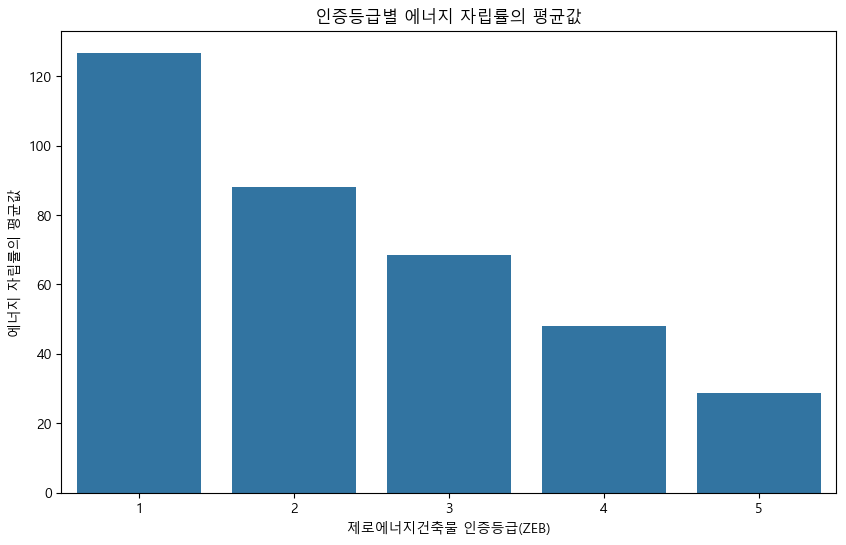

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 각 인증등급별 에너지 자립률의 평균값 비교 
mean_values = data.groupby('제로에너지건축물 인증등급(ZEB)')['에너지 자립률'].mean()
print(mean_values)

# 인증등급별 에너지 자립률의 평균값을 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='제로에너지건축물 인증등급(ZEB)', y='에너지 자립률', ci=None)
plt.title('인증등급별 에너지 자립률의 평균값')
plt.xlabel('제로에너지건축물 인증등급(ZEB)')
plt.ylabel('에너지 자립률의 평균값')
plt.show()


**ANOVA 분석**: 
- 여러 그룹(인증등급별) 간 에너지 자립률의 차이를 검증하는 다중 그룹 비교 방법.

In [10]:
# ANOVA 분석 (인증등급별 에너지 자립률 비교)
grouped_data = [data[data['제로에너지건축물 인증등급(ZEB)'] == grade]['에너지 자립률'] for grade in data['제로에너지건축물 인증등급(ZEB)'].unique()]
anova_result = stats.f_oneway(*grouped_data)
print(f"ANOVA 결과: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA 결과: F-value = 10023.198625672336, p-value = 0.0


인증등급별 에너지 자립률 간의 차이가 유의미하다

### 건물주 용도별 에너지 자립률 ANOVA 비교

##### 건물 용도별 그룹화

C:\Users\82106\AppData\Local\Temp\ipykernel_42020\1467182534.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='건물주용도', y='에너지 자립률', ci=None)


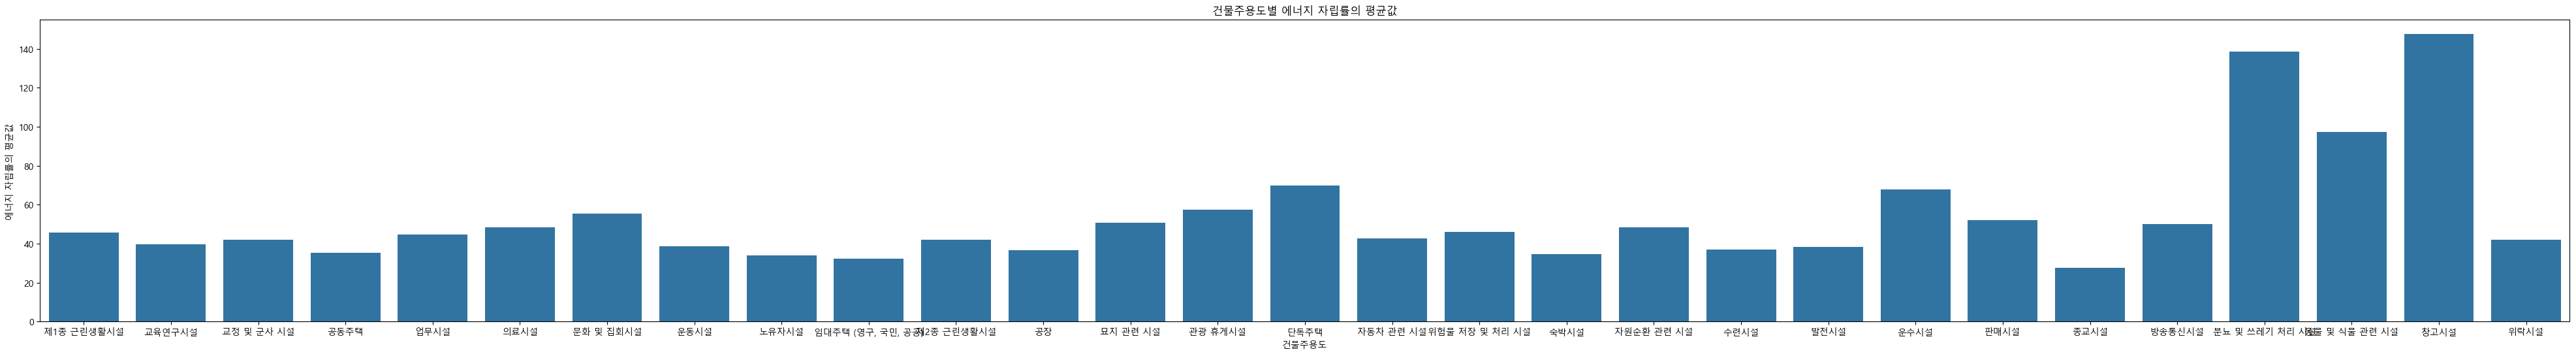

In [24]:
# 각 건물주용도별 에너지 자립률의 평균값 비교
mean_values = data.groupby('건물주용도')['에너지 자립률'].mean()

# 건물주용도별 에너지 자립률의 평균값을 시각화
plt.figure(figsize=(50, 6))
sns.barplot(data=data, x='건물주용도', y='에너지 자립률', ci=None)
plt.title('건물주용도별 에너지 자립률의 평균값')
plt.xlabel('건물주용도')
plt.ylabel('에너지 자립률의 평균값')
plt.show()

In [14]:
# ANOVA 분석 (건물주용도별 에너지 자립률 비교)
grouped_data = [data[data['건물주용도'] == use]['에너지 자립률'] for use in data['건물주용도'].unique()]
anova_result = stats.f_oneway(*grouped_data)
print(f"ANOVA 결과 (건물주용도별): F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA 결과 (건물주용도별): F-value = 15.811525661979545, p-value = 1.8882477904014272e-72


건물주용도 간의 에너지 자립률 차이가 통계적으로 유의미하다

### Tukey's HSD

**Tukey의 HSD 검정: ANOVA에서 유의미한 차이가 발견된 그룹 간 차이를 확인**

In [16]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD 사후 검정
tukey_result = pairwise_tukeyhsd(data['에너지 자립률'], data['건물주용도'])
print(tukey_result)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1            group2       meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------
             공동주택                공장    1.1961    1.0  -13.6694  16.0615  False
             공동주택           관광 휴게시설   22.1938 0.0005    5.0655   39.322   True
             공동주택            교육연구시설    4.3997 0.9998   -6.7338  15.5332  False
             공동주택        교정 및 군사 시설    6.8062 0.9347   -4.8883  18.5006  False
             공동주택             노유자시설   -1.3804    1.0  -13.2613  10.5005  False
             공동주택              단독주택   34.5855    0.0   12.5742  56.5968   True
             공동주택     동물 및 식물 관련 시설   62.1253    0.0   30.0036  94.2469   True
             공동주택          묘지 관련 시설   15.4014 0.3814   -3.8668  34.6696  False
             공동주택         문화 및 집회시설   20.0257    0.0    7.8455   32.206   True
             공동주택              발전시설    3.1567    1.0

### 시각화를 위한 프레임 변환

In [18]:
# Tukey's HSD 결과를 데이터 프레임으로 변환
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
print(tukey_df)

         group1      group2  meandiff   p-adj     lower     upper  reject
0          공동주택          공장    1.1961  1.0000  -13.6694   16.0615   False
1          공동주택     관광 휴게시설   22.1938  0.0005    5.0655   39.3220    True
2          공동주택      교육연구시설    4.3997  0.9998   -6.7338   15.5332   False
3          공동주택  교정 및 군사 시설    6.8062  0.9347   -4.8883   18.5006   False
4          공동주택       노유자시설   -1.3804  1.0000  -13.2613   10.5005   False
..          ...         ...       ...     ...       ...       ...     ...
401  제2종 근린생활시설        창고시설  105.3946  0.0000   54.7232  156.0661    True
402  제2종 근린생활시설        판매시설   10.1257  1.0000  -20.6307   40.8821   False
403        종교시설        창고시설  119.7183  0.0000   41.7366  197.7000    True
404        종교시설        판매시설   24.4494  1.0000  -42.3301   91.2290   False
405        창고시설        판매시설  -95.2689  0.0000 -152.2187  -38.3191    True

[406 rows x 7 columns]


C:\Users\82106\AppData\Local\Temp\ipykernel_42020\4058901888.py:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


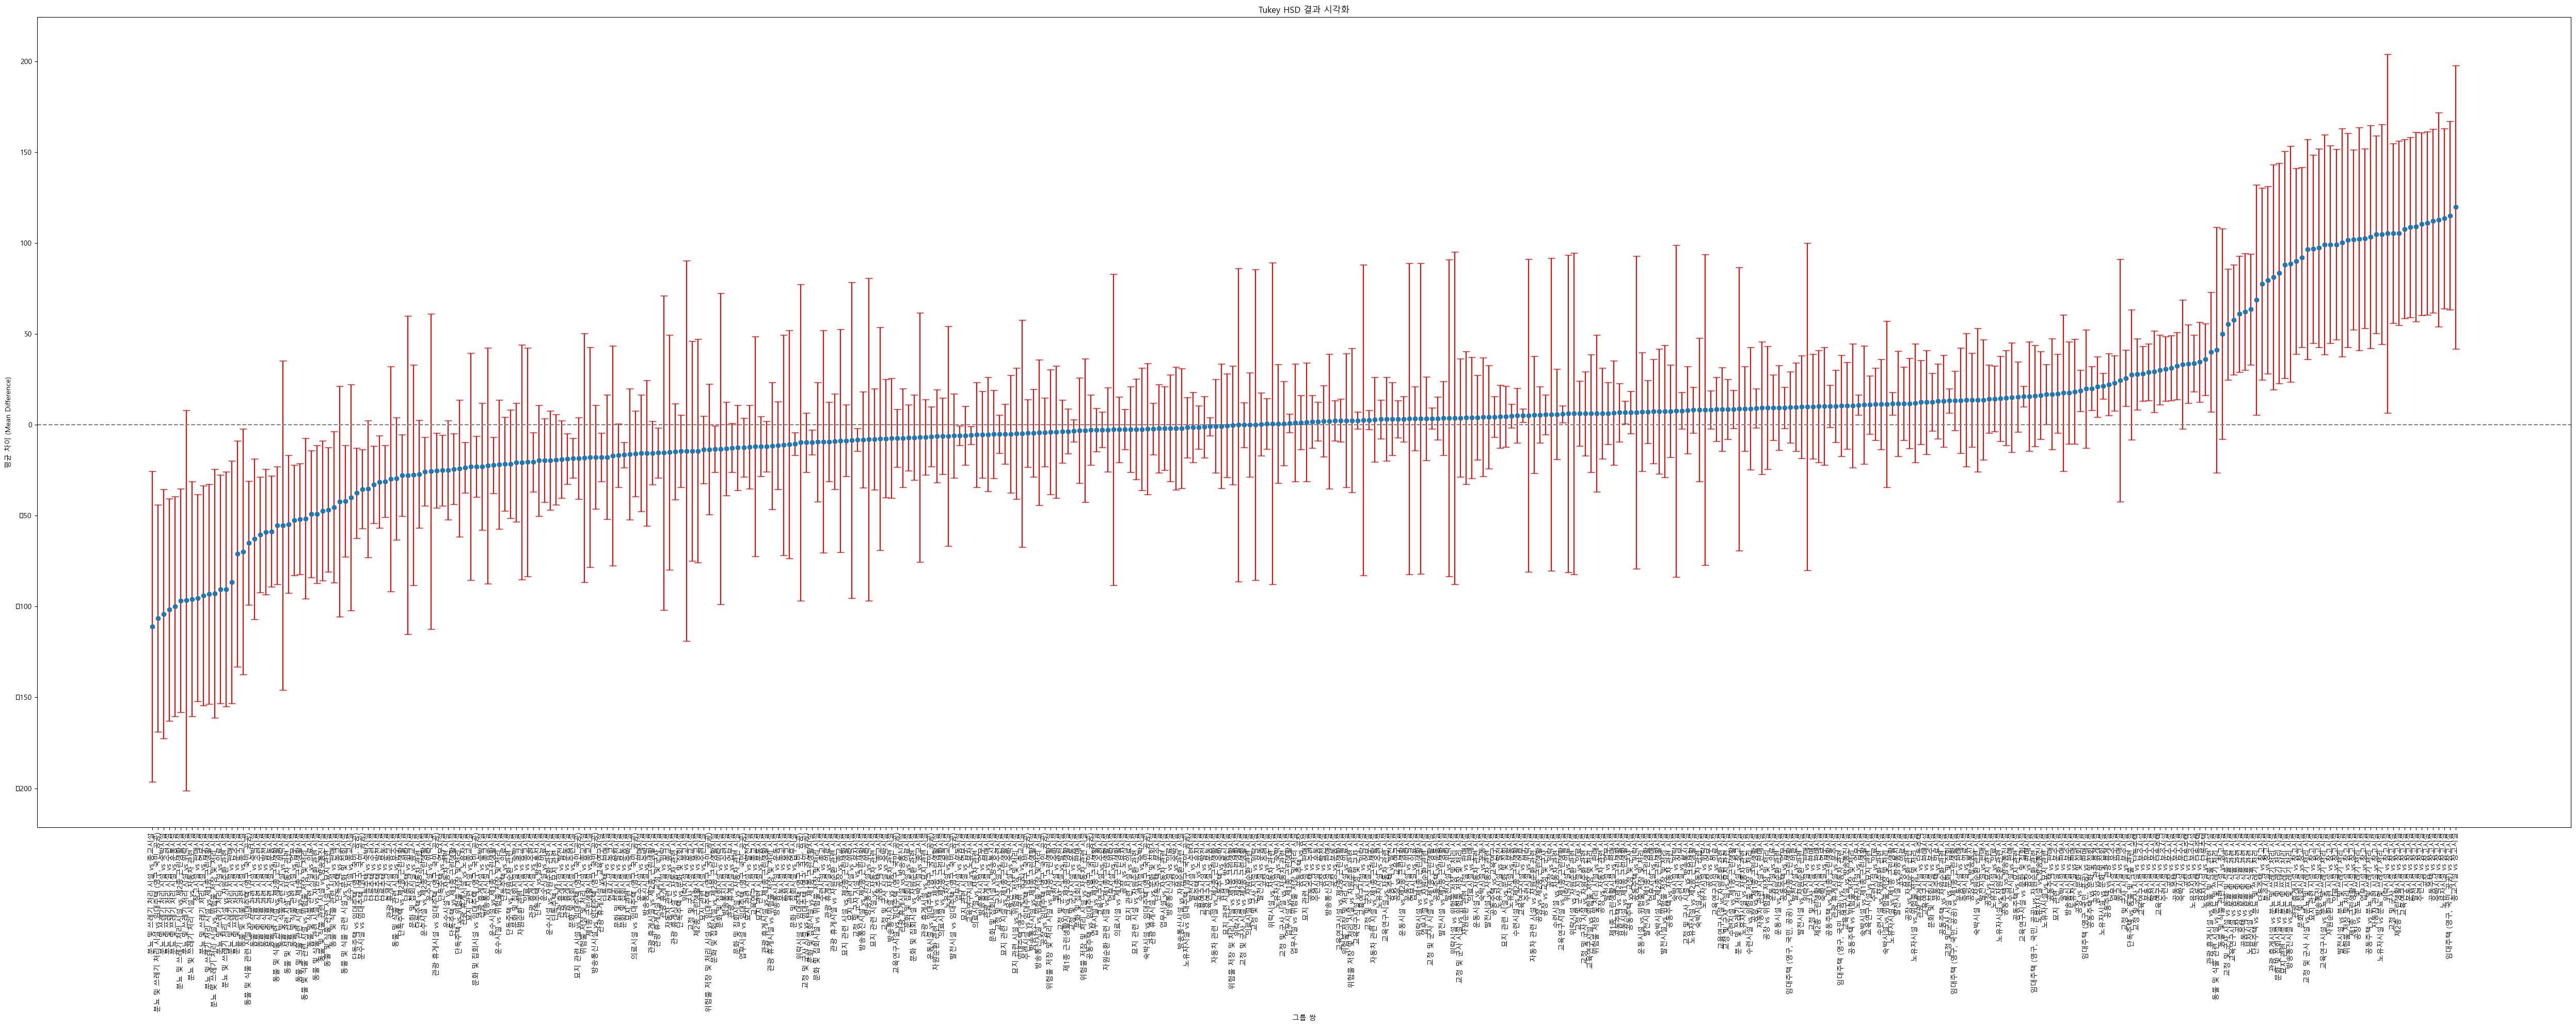

In [22]:
tukey_df = tukey_df.sort_values(by='meandiff')

# 시각화
plt.figure(figsize=(50,20))
plt.errorbar(tukey_df['group1'] + ' vs ' + tukey_df['group2'], tukey_df['meandiff'], 
             yerr=(tukey_df['meandiff'] - tukey_df['lower'], tukey_df['upper'] - tukey_df['meandiff']),
             fmt='o', ecolor='r', capsize=5)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Tukey HSD 결과 시각화')
plt.xlabel('그룹 쌍')
plt.ylabel('평균 차이 (Mean Difference)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 평균 차이가 50 이상인 그룹 쌍 필터링

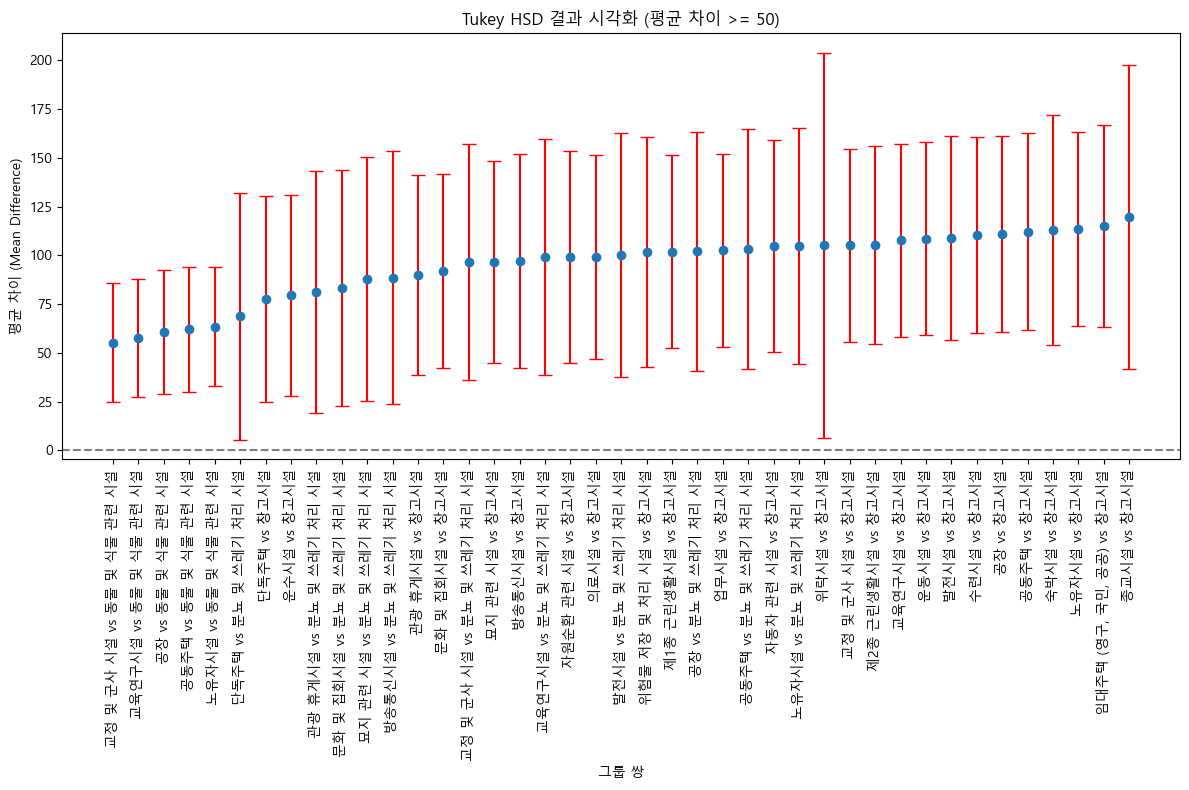

In [25]:
# 평균 차이가 50 이상인 그룹 쌍 필터링
filtered_tukey_df = tukey_df[tukey_df['meandiff'] >= 50]

# 필터링된 데이터프레임 시각화
plt.figure(figsize=(12, 8))
plt.errorbar(filtered_tukey_df['group1'] + ' vs ' + filtered_tukey_df['group2'], filtered_tukey_df['meandiff'], 
             yerr=(filtered_tukey_df['meandiff'] - filtered_tukey_df['lower'], filtered_tukey_df['upper'] - filtered_tukey_df['meandiff']),
             fmt='o', ecolor='r', capsize=5)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Tukey HSD 결과 시각화 (평균 차이 >= 50)')
plt.xlabel('그룹 쌍')
plt.ylabel('평균 차이 (Mean Difference)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
filtered_tukey_df 

,group1,group2,meandiff,p-adj,lower,upper,reject
108,교정 및 군사 시설,동물 및 식물 관련 시설,55.3191,0.0000,24.8347,85.8036,True
84,교육연구시설,동물 및 식물 관련 시설,57.7255,0.0000,27.4518,87.9993,True
33,공장,동물 및 식물 관련 시설,60.9292,0.0000,29.0933,92.7651,True
6,공동주택,동물 및 식물 관련 시설,62.1253,0.0000,30.0036,94.2469,True
131,노유자시설,동물 및 식물 관련 시설,63.5057,0.0000,32.9492,94.0621,True
158,단독주택,분뇨 및 쓰레기 처리 시설,68.8035,0.0156,5.4509,132.1561,True
173,단독주택,창고시설,77.5368,0.0000,24.6471,130.4266,True
349,운수시설,창고시설,79.6230,0.0000,28.1100,131.1361,True
64,관광 휴게시설,분뇨 및 쓰레기 처리 시설,81.1952,0.0004,19.3694,143.0211,True
218,문화 및 집회시설,분뇨 및 쓰레기 처리 시설,83.3633,0.0001,22.7215,144.0050,True


#### 그룹 간 비교를 통한 베스트 프랙티스 도입

에너지 자립률이 높은 그룹에서 사용 중인 에너지 관리 및 절약 방법을 에너지 자립률이 낮은 그룹에 도입한다.